# Women's day 20-10 with love <3

> Nắng Sài Gòn anh đi mà chợt mát

> Bởi vì em mặc áo lụa Hà Đông

> Anh vẫn yêu màu áo ấy vô cùng

> Thơ của anh vẫn còn nguyên lụa trắng

> - Nguyên Sa


In [1]:
key_word=u"phụ_nữ"

In [2]:
import logging
import numpy as np  
from gensim.models import Word2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.ERROR)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [3]:
w2v = Word2Vec.load("/home/laampt/nlp/xnews/model_crazy/crazy_w2v_sg10_hs_d200_5mw_r10")

## Định nghĩa về phụ nữ từ báo chí

In [4]:
for w,v in w2v.most_similar(key_word):
    print w, v

chị_em 0.739479482174
đàn_ông 0.734104454517
nam_giới 0.733251512051
mang_thai 0.695401847363
nữ_giới 0.692004144192
phái_đẹp 0.667046427727
sau_sinh 0.660045325756
gái 0.6580555439
trung_niên 0.654428303242
con_gái 0.648646891117


In [5]:
for w,v in w2v.most_similar([u"xinh_đẹp", u"đảm_đang", u"vui_vẻ"]):
    print w, v

xinh_xắn 0.696319043636
bạn_bè 0.670398890972
ngưỡng_mộ 0.662504553795
dịu_dàng 0.654883742332
tháo_vát 0.651897549629
trò_chuyện 0.651685118675
hiền_hậu 0.651608765125
vui_tính 0.649040341377
duyên_dáng 0.645070254803
vui 0.640766143799


In [6]:
for w,v in w2v.most_similar(u"chị_em", topn=10):
    print w, v

phụ_nữ 0.739479422569
phái_đẹp 0.696743369102
làm_đẹp 0.681572198868
da 0.679400444031
phương_pháp 0.642688930035
chăm_sóc 0.641081988811
âm_đạo 0.640467107296
căng 0.628702819347
vùng_kín 0.623851716518
sau_sinh 0.619905412197


In [7]:
import gensim

dictionary = gensim.corpora.Dictionary.load('/home/laampt/nlp/xnews/model2/xnews.280Kdoc.dict')
corpus = gensim.corpora.MmCorpus('/home/laampt/nlp/xnews/model2/xnews.tfidfcorpus.mm')
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda10.mm2')

In [8]:
print dictionary
print corpus
print lda

Dictionary(87893 unique tokens: [u'b\u1ea3o_th\u1ea1ch', u'to_s\u1ee5', u'bulgary', u'megumi_yokota', u'_n\u01b0\u1edbc']...)
MmCorpus(283346 documents, 87893 features, 43337447 non-zero entries)
LdaModel(num_terms=87893, num_topics=10, decay=0.5, chunksize=10000)


## Word map on newswire

In [9]:
def get_topic_prob(key_word, dictionary=dictionary):
    return sorted(lda.get_document_topics(dictionary.doc2bow([key_word])), key=lambda x: x[1], reverse=True)[0]

get_topic_prob(key_word)

(7, 0.54997181607576395)

In [10]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
names = [key_word]
sim_vs = [w2v[key_word]]
sims = [1]
labels = [get_topic_prob(key_word)[0]]
for w,v in w2v.most_similar(key_word, topn=500):
    sim_vs += [w2v[w]]
    names += [w]
    sims += [v]
    labels += [get_topic_prob(w)[0]]
    
dist_vs = 1 - cosine_similarity(sim_vs)

In [52]:
import itertools

#set up colors per clusters using a dict
colors = ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
colors += [ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')]
topic_colors = itertools.cycle(colors)

# colors = ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, d94801, D55E00,  CC79A7, 08519c, 006837, F0E442, 4292c6'.split(',')]
# topic_colors = dict(enumerate([colors[ii] for ii in range(10)]))
topics_names = dict(enumerate(["blog", "world", "criminals", "edu", "vietnam", "biz", "tech", "health", "sport", "social"]))

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/home/laampt/ds/local/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [14]:
df = pd.DataFrame(dict(names=names, sims=sims, topics=labels))

In [15]:
df.head()

,names,sims,topics
0,phụ_nữ,1.000000,7
1,chị_em,0.739479,6
2,đàn_ông,0.734104,7
3,nam_giới,0.733252,6
4,mang_thai,0.695402,6


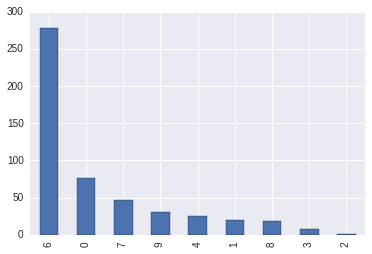

In [16]:
p = df.topics.value_counts().plot(kind='bar')

## TSNE projection

In [17]:
from tsne import tsne
import mpld3
mpld3.enable_notebook()

In [ ]:
tsnemat = tsne(np.asfarray(dist_vs))

In [19]:
df['x2'] = tsnemat[:,0]
df['y2'] = tsnemat[:,1]

df.head()

,names,sims,topics,x2,y2
0,phụ_nữ,1.000000,7,-1.051744,9.901948
1,chị_em,0.739479,6,-1.159907,8.166170
2,đàn_ông,0.734104,7,26.555592,11.205444
3,nam_giới,0.733252,6,-5.208831,10.084246
4,mang_thai,0.695402,6,-44.500027,19.808542


In [53]:
mpld3.enable_notebook()

fig, ax = plt.subplots(figsize=(14,12), subplot_kw=dict(axisbg='#EEEEEE'))
elements = []
for topic in range(lda.num_topics):
    scatter = ax.scatter(df[df.topics==topic]['x2'].values,
                         df[df.topics==topic]['y2'].values,
#                          c=next(ax._get_lines.color_cycle),
                         c=next(topic_colors),
                         s=1000 * df[df.topics==topic]['sims'].values,
                         label=topics_names[topic],
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('jet', 10))
    

    labels = list(df[df.topics==topic]['names'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    
    
# plot keyword text
plt.text(df[df.names==key_word]['x2'].values[0], df[df.names==key_word]['y2'].values[0], key_word, ha = 'right', va = 'bottom', size=14)

# adding legend
labels = [u"{}: {}".format(i, topics_names[i]) for i in range(lda.num_topics)]
mpld3.plugins.connect(fig, mpld3.plugins.InteractiveLegendPlugin(elements, labels))
# ax.legend(scatterpoints=1,loc='best')

#set tick marks as blank
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

#set axis as blank
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 500 words related with {}".format(key_word), size=14) 

mpld3.display() #show the plot
# html = mpld3.fig_to_html(fig)

In [28]:
pyLDAvis.display(vis_data)